In [136]:
import pandas as pd
import csv
from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt

In [24]:
# import and clean county data from wikipedia

countypath = "./countydata.csv"
rawdata = []
with open(countypath, "r") as file:
    csvreader = csv.reader(file)
    
    next(csvreader)

    for row in csvreader:
        if row[0].startswith("("):
            continue

        rawdata.append([row[0],row[3],row[-1]])

        
# with open("./extracted_county_data.csv","w") as file:
#     writer = csv.writer(file)    
#     for row in rawdata:
#         writer.writerow(row)

In [53]:
# further cleaning of extracted county data

countystats_df = pd.read_csv("./extracted_county_data.csv")
countystats_df.head()

,County,Origin,Map
0,Anderson County,1846,"1,071 sq mi"
1,Andrews County,1876,"1,501 sq mi"
2,Angelina County,1846,802 sq mi
3,Aransas County,1871,252 sq mi
4,Archer County,1858,910 sq mi


In [54]:
countystats_df.isnull().sum()

County    0
Origin    0
Map       0
dtype: int64

In [55]:
countystats_df[countystats_df["Map"].isnull()==True]

,County,Origin,Map


In [56]:
countystats_df.isna().sum()

County    0
Origin    0
Map       0
dtype: int64

In [57]:
def area_clean(row):
    try:
        return int(row.split(" ")[0].replace(",",""))
    except:
        print(row)

In [59]:
countystats_df["Map"] = countystats_df["Map"].apply(area_clean)

In [65]:
countystats_df["County"]=countystats_df["County"].apply(lambda row : row.split(" ")[0] )

In [66]:
countystats_df.head()

,County,Origin,Map
0,Anderson,1846,1071
1,Andrews,1876,1501
2,Angelina,1846,802
3,Aransas,1871,252
4,Archer,1858,910


# working with case data

In [93]:
texascases = pd.read_csv("texascases.csv")

In [94]:
texascases.head()

,County Name,Population,Cases 03-04,Cases 03-05,Cases 03-06,Cases 03-09,Cases 03-10,Cases 03-11,Cases 03-12,Cases 03-13,...,Cases 04-16,Cases 04-17,Cases 04-18,Cases 04-19,Cases 04-20,Cases 04-21,Cases 04-22,Cases 04-23,Cases 04-24,Cases 04-25
0,Anderson,"62,245",0,0,0,0,0,0,0,0,...,6,6,6,8,8,10,14,14,16,16
1,Andrews,"17,487",0,0,0,0,0,0,0,0,...,19,19,19,19,19,19,19,19,19,19
2,Angelina,"94,245",0,0,0,0,0,0,0,0,...,20,23,23,23,23,27,30,31,33,36
3,Aransas,"26,041",0,0,0,0,0,0,0,0,...,2,2,2,2,2,2,2,2,2,2
4,Archer,"9,847",0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [95]:
df = pd.concat([countystats_df,texascases], axis="columns", join="inner")
df.drop(columns="County", inplace=True)
df["Population"]=df["Population"].str.replace(",","").astype(int)

In [96]:

df.set_index("County Name",inplace=True)
df.head()

,Origin,Map,Population,Cases 03-04,Cases 03-05,Cases 03-06,Cases 03-09,Cases 03-10,Cases 03-11,Cases 03-12,...,Cases 04-16,Cases 04-17,Cases 04-18,Cases 04-19,Cases 04-20,Cases 04-21,Cases 04-22,Cases 04-23,Cases 04-24,Cases 04-25
County Name,,,,,,,,,,,,,,,,,,,,,
Anderson,1846,1071,62245,0,0,0,0,0,0,0,...,6,6,6,8,8,10,14,14,16,16
Andrews,1876,1501,17487,0,0,0,0,0,0,0,...,19,19,19,19,19,19,19,19,19,19
Angelina,1846,802,94245,0,0,0,0,0,0,0,...,20,23,23,23,23,27,30,31,33,36
Aransas,1871,252,26041,0,0,0,0,0,0,0,...,2,2,2,2,2,2,2,2,2,2
Archer,1858,910,9847,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [97]:
comment_df = df.loc[["Fort Bend","Harris","Dallas","Bexar","Travis"]][["Map","Population","Cases \n04-22"]]
comment_df

,Map,Population,Cases 04-22
County Name,,,
Fort Bend,875,888595,808
Harris,1729,4885616,5143
Dallas,888,2639966,2602
Bexar,1247,2062088,1080
Travis,989,1277007,1233


In [116]:
comment_df["rate"] = comment_df["Cases \n04-22"]/comment_df["Population"]
comment_df

,Map,Population,Cases 04-22,rate
County Name,,,,
Fort Bend,875,888595,808,0.000909
Harris,1729,4885616,5143,0.001053
Dallas,888,2639966,2602,0.000986
Bexar,1247,2062088,1080,0.000524
Travis,989,1277007,1233,0.000966


In [206]:
comment_df["Density"] = comment_df["Population"]/comment_df["Map"]

In [208]:
comment_df.to_markdown()

AttributeError: 'DataFrame' object has no attribute 'to_markdown'

## comparison across all counties

In [113]:
df[["Map","Population","Cases \n04-22"]]
df["Density"] = df["Population"]/df["Map"]
df["Rate"] = df["Cases \n04-22"]/df["Population"]
df.head()

,Origin,Map,Population,Cases 03-04,Cases 03-05,Cases 03-06,Cases 03-09,Cases 03-10,Cases 03-11,Cases 03-12,...,Cases 04-18,Cases 04-19,Cases 04-20,Cases 04-21,Cases 04-22,Cases 04-23,Cases 04-24,Cases 04-25,Density,Rate
County Name,,,,,,,,,,,,,,,,,,,,,
Anderson,1846,1071,62245,0,0,0,0,0,0,0,...,6,8,8,10,14,14,16,16,58.118581,0.000225
Andrews,1876,1501,17487,0,0,0,0,0,0,0,...,19,19,19,19,19,19,19,19,11.650233,0.001087
Angelina,1846,802,94245,0,0,0,0,0,0,0,...,23,23,23,27,30,31,33,36,117.512469,0.000318
Aransas,1871,252,26041,0,0,0,0,0,0,0,...,2,2,2,2,2,2,2,2,103.337302,0.000077
Archer,1858,910,9847,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,10.820879,0.000000


In [115]:
df.sort_values("Rate", ascending=False).head(20)

,Origin,Map,Population,Cases 03-04,Cases 03-05,Cases 03-06,Cases 03-09,Cases 03-10,Cases 03-11,Cases 03-12,...,Cases 04-18,Cases 04-19,Cases 04-20,Cases 04-21,Cases 04-22,Cases 04-23,Cases 04-24,Cases 04-25,Density,Rate
County Name,,,,,,,,,,,,,,,,,,,,,
Moore,1876,900,25817,0,0,0,0,0,0,0,...,99,106,121,139,162,172,186,192,28.685556,0.006275
Donley,1876,930,3873,0,0,0,0,0,0,0,...,23,23,23,24,24,24,24,24,4.164516,0.006197
Sherman,1876,923,3440,0,0,0,0,0,0,0,...,7,7,7,7,9,10,10,11,3.726977,0.002616
Shelby,1836,794,28649,0,0,0,0,0,0,0,...,60,60,60,69,69,85,86,86,36.081864,0.002408
Roberts,1876,924,994,0,0,0,0,0,0,0,...,2,2,2,2,2,2,2,2,1.075758,0.002012
Panola,1846,801,25965,0,0,0,0,0,0,0,...,37,37,38,42,49,61,70,70,32.415730,0.001887
Washington,1836,609,37673,0,0,0,0,0,0,0,...,50,52,61,67,71,77,78,103,61.860427,0.001885
San Augustine,1836,528,9340,0,0,0,0,0,0,0,...,14,14,14,14,14,15,16,16,17.689394,0.001499
Lubbock,1876,900,313938,0,0,0,0,0,0,0,...,407,419,430,445,458,470,481,494,348.820000,0.001459


In [119]:
df.sort_values("Density", ascending=False).head(20)

,Origin,Map,Population,Cases 03-04,Cases 03-05,Cases 03-06,Cases 03-09,Cases 03-10,Cases 03-11,Cases 03-12,...,Cases 04-18,Cases 04-19,Cases 04-20,Cases 04-21,Cases 04-22,Cases 04-23,Cases 04-24,Cases 04-25,Density,Rate
County Name,,,,,,,,,,,,,,,,,,,,,
Dallas,1846,888,2639966,0,0,0,0,0,2,3,...,2190,2324,2428,2512,2602,2683,2763,2834,2972.934685,0.000986
Harris,1836,1729,4885616,0,0,4,5,5,5,7,...,4460,4653,4823,4977,5143,5211,5330,5482,2825.688837,0.001053
Tarrant,1849,864,2127850,0,0,0,0,0,1,1,...,1175,1229,1242,1249,1333,1430,1559,1706,2462.789352,0.000626
Bexar,1836,1247,2062088,0,0,0,0,0,0,0,...,959,992,1015,1029,1080,1126,1167,1195,1653.639134,0.000524
Collin,1846,848,1150398,0,0,0,1,3,3,3,...,521,522,527,544,570,584,609,639,1356.601415,0.000495
Travis,1840,989,1277007,0,0,0,0,0,0,0,...,1074,1092,1108,1174,1233,1263,1312,1379,1291.210313,0.000966
Denton,1846,888,943020,0,0,0,0,0,0,0,...,585,592,593,598,619,644,661,680,1061.959459,0.000656
Fort Bend,1837,875,888595,0,0,1,6,6,6,6,...,755,755,783,799,808,870,889,905,1015.537143,0.000909
El Paso,1848,1013,952366,0,0,0,0,0,0,0,...,482,505,531,540,587,645,674,706,940.144126,0.000616


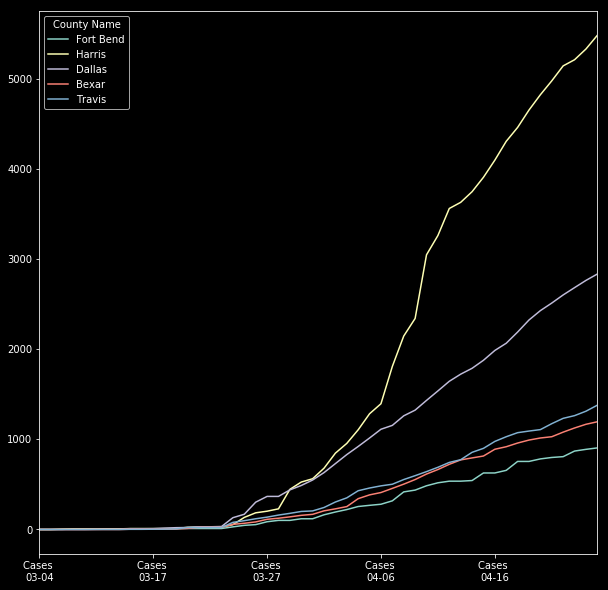

In [132]:
df[[col for col in df if col.startswith("Cases")]].loc[["Fort Bend","Harris","Dallas","Bexar","Travis"]].T.plot(figsize=(10,10))

In [137]:
case_data_only = df[[col for col in df if col.startswith("Cases")]]

In [145]:
case_data_only.T.index

Index(['Cases \n03-04', 'Cases \n03-05', 'Cases \n03-06', 'Cases \n03-09',
       'Cases \n03-10', 'Cases \n03-11', 'Cases \n03-12', 'Cases \n03-13',
       'Cases \n03-15', 'Cases \n03-16', 'Cases \n03-17', 'Cases \n03-18',
       'Cases \n03-19', 'Cases \n03-20', 'Cases \n03-21', 'Cases \n03-22',
       'Cases \n03-23', 'Cases \n03-24', 'Cases \n03-25', 'Cases \n03-26',
       'Cases \n03-27', 'Cases \n03-28', 'Cases \n03-29', 'Cases \n03-30',
       'Cases \n03-31', 'Cases \n04-01', 'Cases \n04-02', 'Cases \n04-03',
       'Cases \n04-04', 'Cases \n04-05', 'Cases \n04-06', 'Cases \n04-07',
       'Cases \n04-08', 'Cases \n04-09', 'Cases \n04-10', 'Cases \n04-11',
       'Cases \n04-12', 'Cases \n04-13', 'Cases \n04-14', 'Cases \n04-15',
       'Cases \n04-16', 'Cases \n04-17', 'Cases \n04-18', 'Cases \n04-19',
       'Cases \n04-20', 'Cases \n04-21', 'Cases \n04-22', 'Cases \n04-23',
       'Cases \n04-24', 'Cases \n04-25'],
      dtype='object')

In [157]:
case_data_only.head()

,Cases 03-04,Cases 03-05,Cases 03-06,Cases 03-09,Cases 03-10,Cases 03-11,Cases 03-12,Cases 03-13,Cases 03-15,Cases 03-16,...,Cases 04-16,Cases 04-17,Cases 04-18,Cases 04-19,Cases 04-20,Cases 04-21,Cases 04-22,Cases 04-23,Cases 04-24,Cases 04-25
County Name,,,,,,,,,,,,,,,,,,,,,
Anderson,0,0,0,0,0,0,0,0,0,0,...,6,6,6,8,8,10,14,14,16,16
Andrews,0,0,0,0,0,0,0,0,0,0,...,19,19,19,19,19,19,19,19,19,19
Angelina,0,0,0,0,0,0,0,0,0,0,...,20,23,23,23,23,27,30,31,33,36
Aransas,0,0,0,0,0,0,0,0,0,0,...,2,2,2,2,2,2,2,2,2,2
Archer,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


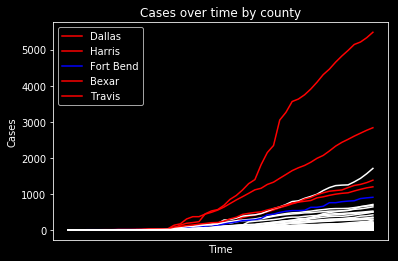

In [205]:
fig,ax = plt.subplots()
handles = []
for col in case_data_only.index:

    curr = case_data_only.T[col]

    if col in ["Harris","Dallas","Bexar","Travis"]:
        color = "red"
    elif col == "Fort Bend":
        color = "blue"
    else:
        color = "white"

    line, = ax.plot(case_data_only.T.index, curr, color=color)
    line.set_label(col)

    if col in ["Fort Bend","Harris","Dallas","Bexar","Travis"]:
        handles.append(line)

ax.legend(handles, ["Dallas","Harris","Fort Bend","Bexar","Travis"])
plt.xticks([])
plt.xlabel("Time")
plt.ylabel("Cases")
plt.title("Cases over time by county")
plt.show()

In [143]:
df.columns

Index(['Origin', 'Map', 'Population', 'Cases \n03-04', 'Cases \n03-05',
       'Cases \n03-06', 'Cases \n03-09', 'Cases \n03-10', 'Cases \n03-11',
       'Cases \n03-12', 'Cases \n03-13', 'Cases \n03-15', 'Cases \n03-16',
       'Cases \n03-17', 'Cases \n03-18', 'Cases \n03-19', 'Cases \n03-20',
       'Cases \n03-21', 'Cases \n03-22', 'Cases \n03-23', 'Cases \n03-24',
       'Cases \n03-25', 'Cases \n03-26', 'Cases \n03-27', 'Cases \n03-28',
       'Cases \n03-29', 'Cases \n03-30', 'Cases \n03-31', 'Cases \n04-01',
       'Cases \n04-02', 'Cases \n04-03', 'Cases \n04-04', 'Cases \n04-05',
       'Cases \n04-06', 'Cases \n04-07', 'Cases \n04-08', 'Cases \n04-09',
       'Cases \n04-10', 'Cases \n04-11', 'Cases \n04-12', 'Cases \n04-13',
       'Cases \n04-14', 'Cases \n04-15', 'Cases \n04-16', 'Cases \n04-17',
       'Cases \n04-18', 'Cases \n04-19', 'Cases \n04-20', 'Cases \n04-21',
       'Cases \n04-22', 'Cases \n04-23', 'Cases \n04-24', 'Cases \n04-25',
       'Density', 'Rate'],
 